<a href="https://colab.research.google.com/github/Srikrishna1987/data-analyst-tools/blob/main/Google_search_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: write a phython code for uploading a file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data-export (1) (1).csv to data-export (1) (1).csv
User uploaded file "data-export (1) (1).csv" with length 295714 bytes


# New section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [ ]:
!pip install pytrends

# setup pytrend library and keyword define

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "artificial intelligence"

# **Data Request**

In [ ]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

# **Country wise interest**

In [ ]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

/tmp/ipython-input-53-1920031448.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




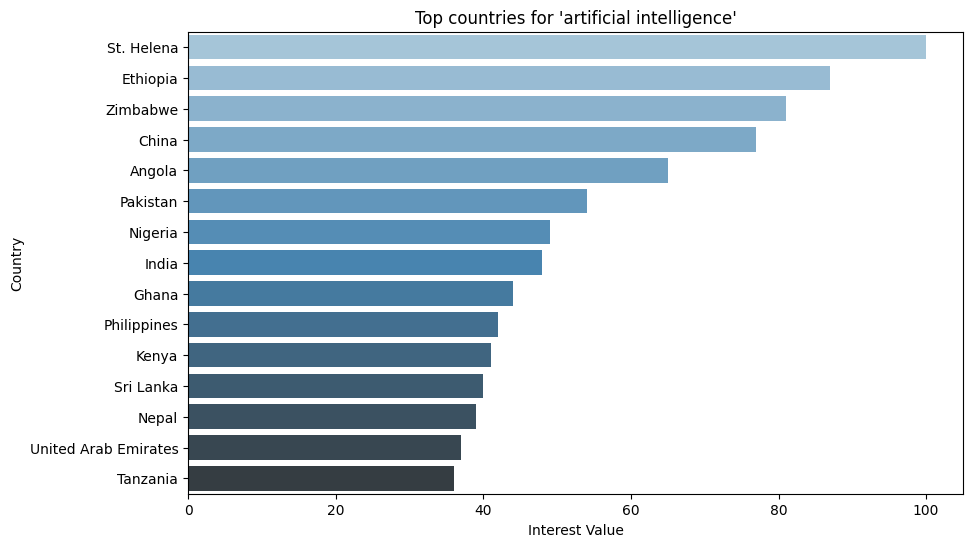

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index,palette ="Blues_d")
plt.title(f"Top countries for '{keyword}'")
plt.xlabel("Interest Value")
plt.ylabel("Country")
plt.show()

# **World map**

In [ ]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                      locations= 'geoName',
                      locationmode='country names',
                      color=keyword,
                      title=f"Search interest for '{keyword}'by country",
                      color_continuous_scale='Blues')
fig.show()

# **Time wise Interest**

In [ ]:
time_data = pytrends.interest_over_time()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



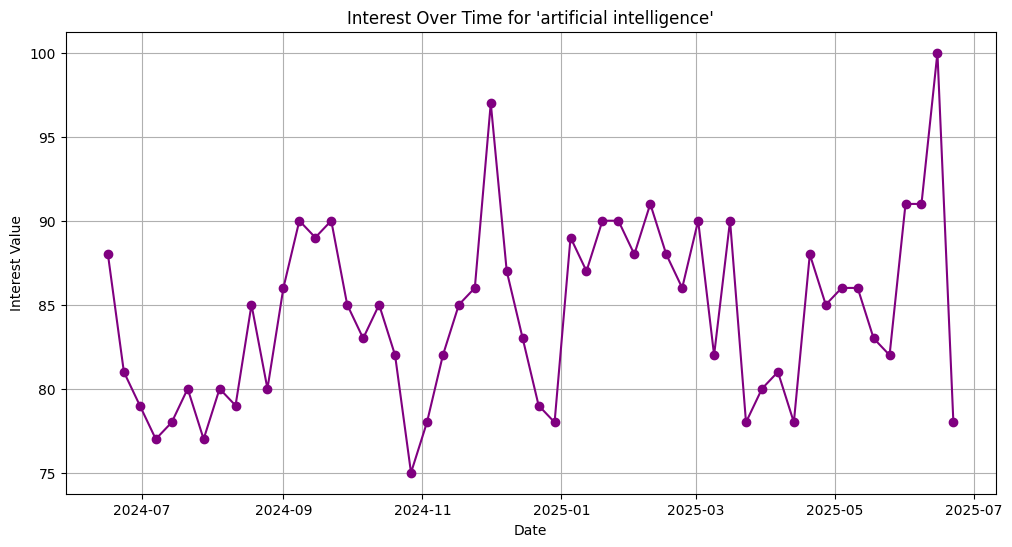

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time_data.index,time_data[keyword],marker = 'o',color = 'purple')
plt.title(f"Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest Value")
plt.grid(True)
plt.show()

# **Multiple keyword compare**

In [ ]:
kw_list = ["artificial inelligence", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe='today 12-m', geo ='', gprop='')

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



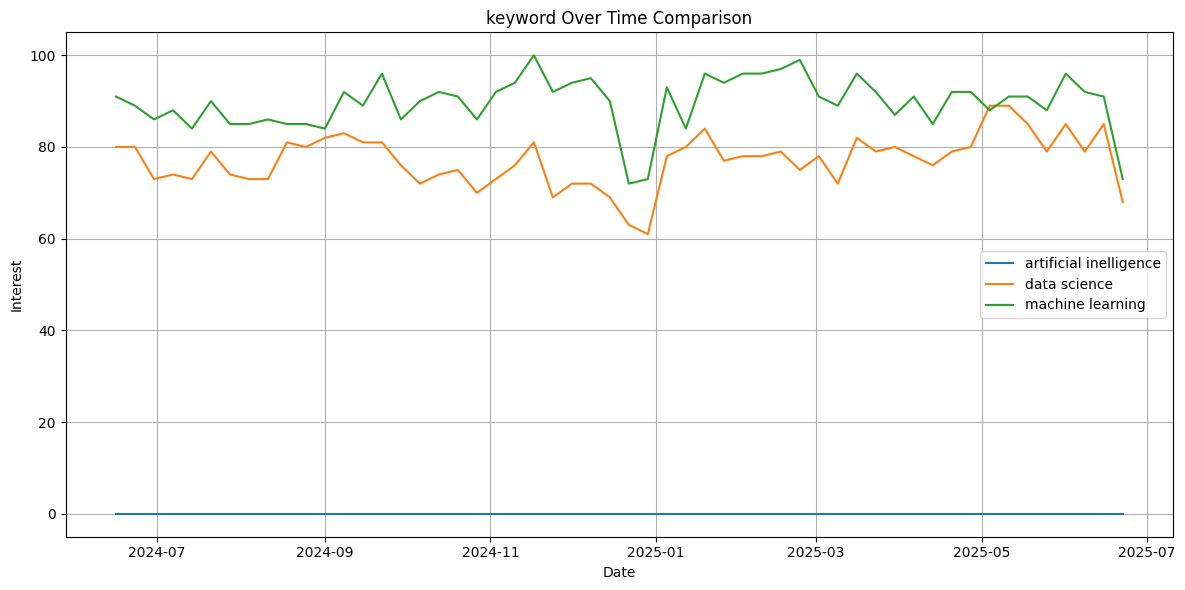

In [ ]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
  plt.plot(compare_df.index, compare_df[kw],label=kw)
plt.title("keyword Over Time Comparison")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()